# 신경망 학습

### 오차 제곱합

In [1]:
import numpy as np

# 오차 제곱합
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

### 교차 엔트로피 오차

In [3]:
def cross_entropy_errr(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

### 미니배치 학습

In [4]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [5]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### (배치용) 교차 엔트로피 오차 구현하기

In [6]:
def cross_entropy_error(y, t):
    if y.ndim -- 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

### 수치미분

In [3]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)

In [4]:
# y = 0.01x^2 + 0.1x
def function_1(x):
    return 0.01*x**2 + 0.1*x

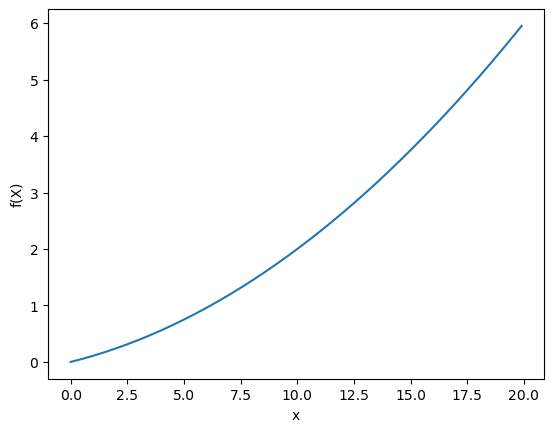

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(X)")
plt.plot(x, y)
plt.show()

In [6]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### 편미분

In [7]:
# f(x0, x1) = x0^2 + x1^2
def function_2(x):
    return x[0]**2 + x[1] ** 2

In [8]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [9]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

### 기울기

In [20]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [21]:
# 세 점(3, 4), (0, 2), (3, 0) 에서의 기울기
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


### 경사 하강법

In [23]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [25]:
# 경사법으로 f(x0, x1) = x0^2 + x1^2의 최솟값을 구해라
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [27]:
# 학습률이 너무 큰 예: 1r = 10.0
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100))

# 학습률이 너무 작은 예: lr = 1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100))


[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


### 신경망에서의 기울기

In [30]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.rand(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [32]:
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p)
t = np.array([0, 0, 1])
net.loss(x, t)

[[0.98328767 0.78903397 0.8037905 ]
 [0.75688667 0.98874859 0.50873678]]
[1.2711706  1.36329412 0.9401374 ]


1.3658819465954029

In [33]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.2131679   0.23373866 -0.44690656]
 [ 0.31975185  0.35060799 -0.67035984]]


### 2층 신경망 클래스 구현하기

In [44]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads


In [45]:

net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10) 
net.params['W1'].shape # (784, 100)
net.params['b1'].shape #(100,)
net.params['W2'].shape # (100, 10)
net.params['b2'].shape # (10,)

(10,)

In [46]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [47]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

grads['W1'].shape
grads['b1'].shape
grads['W2'].shape
grads['b2'].shape

(10,)

### 미니배치 학습 구현하기

In [52]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

KeyboardInterrupt: 

In [ ]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

iter_per_epoch = max(train_size / batch_size = 1)

for i in ragne(iters_num):
    # 미니배치 확득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc) )